In [1]:
%pip install librosa matplotlib

  Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached soxr-0.3.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached soundfile-0.12.1-py2.py3-none-any.whl (24 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)
  Using cached pooch-1.8.0-py3-none-any.whl (62 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
  Using cached msgpack-1.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (534 kB)
  Using cached cffi-1.16.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (444 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
y, sr = librosa.load('docs/trial.wav')
yt,_=librosa.effects.trim(y)

In [5]:
y=yt

In [6]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np

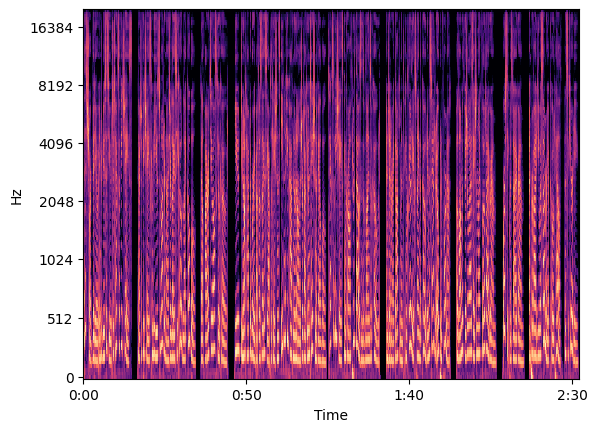

In [8]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
#plt.title('Mel Spectrogram');
plt.savefig('docs/audio-sample-spectrum.jpeg')

In [ ]:
import re 
import os

In [ ]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [ ]:
path_main='docs/Audio_Speech_Actors_01-24'

In [ ]:
folders_main=os.listdir(path_main)

In [ ]:
counter=0
for folders in folders_main :
    path_in='docs/Audio_Speech_Actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print(numbers[6],emotion)
        path_save='docs/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)